# Les paradigmes de programmation

## La place de la programmation dans la recherche  

### Le menuisier et l'architecte 
La programmation informatique consiste en identifier des problèmes qui peuvent être résolu automatiquement, en concevoir des solutions algorithmiques et à les transcrire en langage informatique (les "coder"). Ces méthodes sont largement répandues dans la pratique actuelle de la science. Ainsi, il est crucial d'en saisir les bases.   

Qu'on se le dise un chercheur n'est pas un ingénieur en génie logiciel et a des besoins très différents en termes de connaissances en programmation. La plupart des chercheurs en biologie sont amenés à écrire des programmes, souvent courts et monotâches, qui s'inscrivent dans le cadre d'une analyse plus globale d'une question scientifique. Même si des méthodes générales peuvent faire l'objet d'une intégration dans des logiciels ou des bibliothèques de plus grande envergure, cela représente une fraction plus faible des chercheurs, et cela arrive le plus souvent comme l'aboutissement d'une démarche de recherche et non comme l'objectif premier.

Une image classique pour comparer l'usage de la programmation par un chercheur ou par un développeur est celle du menuisier et de l'architecte. Le menuisier réalise des pièces plus petites et plus artisanales que l'architecte qui planifie des bâtiments entiers. Les attentes et les outils sont différents, même si elles se rejoignent parfois. Il n'est pas nécessaire d'être un bon architecte pour être un bon menuisier, mais il faut tout de même avoir un certain nombre de connaissances afin de produire des objets de qualité. Il en va de même pour la programmation informatique. 


### De l'abstraction 

Raisonner à propos d'un système nécessite de construire un certain nombre d'abstractions que l'on puisse manipuler. 

Quand les problèmes sont complexes, il est vital de pouvoir manipuler des abstractions bien définies. Si on sait que nos abstractions qu'elles fonctionnent bien et qu'elles n'ont pas d'effet secondaire indésirable sur le reste du code, on peut construire des solutions plus complexe, mais qui restent simples dans leur expression. 

On parle de **barrière d'abstraction** pour désigner le fait que l'on doit pouvoir manipuler des abstractions de haut niveau sans se soucier de leurs détails d'implémentation (voire même sans les connaître ! Il n'est pas nécessaire de tout connaître du *buffer protocol* pour utiliser `numpy` par exemple). 

De manière générale, on dit qu'un code est **modulaire** s'il est composé d'éléments (modules -à ne pas confondre avec les modules Python-) les plus indépendants possibles les un des autres, et qui fonctionnent ensemble simplement. Quand les modules sont bien indépendants, il est possible de les développer et les tester indépendamment et de les réutiliser simplement dans d'autres projets.

Ainsi, les bibliothèques de calcul scientifiques (numpy, sympy..) sont développées et testées indépendamment et réutilisées dans la majorité des programmes python scientifiques.

### Comment écrire des abstractions ?

On appelle *paradigmes* de programmation des ensembles d'abstractions qui régissent la manière de transcrire les problèmes réels en langage informatique.

Python est un langage multi-paradigme, dans le sens où il permet de programmer selon différents paradigmes. Je vous propose de voir quelques idées sur trois d'entre eux: la programmation impérative, la programmation orienté-objet et la programmation fonctionnelle. 


## La programmation Impérative (et procédurale)

La programmation impérative est le paradigme de programmation le plus ancien. Il consiste à résoudre un problème en listant une série d'instructions (assignations, boucles, conditions, opérations) qui modifient l'état d'un programme jusqu'à obtenir la solution. On donne une recette de cuisine qui est suivie ligne à ligne par l'interpréteur.

In [15]:
# Voici un exemple de la recherche d'un motif en programmation impérative.
SEQ = "AGGAAACATGGGTGCTTCACCTTCCCTCCCTGTTCGTTATACATGGCAATCTCGACAGCTCATAAGTAAAAATATGTACTTTGCCAGGGTGTTACTGGAGAGGAGTCAATCTGGATAGATGAGACGACCGCGTCGGGTGACCTTCGGCCCTCGCCGGTTATAGATTCTCGGAGGTACGGGTCCAAGATTCATGTTAGTTTCATCAGAAAGTCTCTCCTGCTCTCCAGTGGCCAGTCTGCCGACTGTGGACTGCCGAGAGCTGTAGCAGACTCTAAGGCGGCTTTACGACGTGAAAAGGCCGAGCCTTTCAGAAGTAACGATCCGCAGCAAGCTTGTGTATACTTCGAATCATATCGCCCCAGCGGCGATAGCTCTCAGTAACAAGACCATGCACCCACGTTGTGAGTGAATTAACTGGGCTATAGATGCCACCCCCTCCAGTGGTCGTGGGCATAATACGCTCCCGGCGACGCGTATTCCGGGAAAGGCAATGTACATCGGAGAATAGCAGCAAGATTATCAGCGGTTGTCTTTTCGTACCCCTTACGCGCAGGTTCGGGGGATAGATCATC"
PATTERN = "TAG"
L = len(PATTERN)
pos = []
for i in range(len(SEQ) - L):
    if SEQ[i:i+L]==PATTERN:
        pos.append(i)
if pos:
    print('Le motif {} se trouve {} position{}: {}'.format(PATTERN,
                                                          'à la' if len(pos)==1 else 'aux',
                                                          '' if len(pos)==1 else 's',
                                                          pos))
else:
    print('Le motif ne se trouve pas dans la séquence')

Le motif TAG se trouve aux positions: [115, 160, 194, 262, 368, 422, 505, 563]


Les programmes purement impératifs sont très souvent structurés en "procédures" qui regroupent et nomment les instructions. En Python les procédures sont des fonctions sans arguments et ne renvoyant pas de valeur.

In [14]:
def initialisation():
    global SEQ 
    global PATTERN 
    global L 
    SEQ = "AGGAAACATGGGTGCTTCACCTTCCCTCCCTGTTCGTTATACATGGCAATCTCGACAGCTCATAAGTAAAAATATGTACTTTGCCAGGGTGTTACTGGAGAGGAGTCAATCTGGATAGATGAGACGACCGCGTCGGGTGACCTTCGGCCCTCGCCGGTTATAGATTCTCGGAGGTACGGGTCCAAGATTCATGTTAGTTTCATCAGAAAGTCTCTCCTGCTCTCCAGTGGCCAGTCTGCCGACTGTGGACTGCCGAGAGCTGTAGCAGACTCTAAGGCGGCTTTACGACGTGAAAAGGCCGAGCCTTTCAGAAGTAACGATCCGCAGCAAGCTTGTGTATACTTCGAATCATATCGCCCCAGCGGCGATAGCTCTCAGTAACAAGACCATGCACCCACGTTGTGAGTGAATTAACTGGGCTATAGATGCCACCCCCTCCAGTGGTCGTGGGCATAATACGCTCCCGGCGACGCGTATTCCGGGAAAGGCAATGTACATCGGAGAATAGCAGCAAGATTATCAGCGGTTGTCTTTTCGTACCCCTTACGCGCAGGTTCGGGGGATAGATCATC"
    PATTERN = "TAG"
    L = len(PATTERN)
    
def recherche():
    global pos 
    pos = []
    for i in range(len(SEQ) - L):
        if SEQ[i:i+L]==PATTERN:
            pos.append(i)
            
def affichage():
    if pos:
        print('Le motif {} se trouve {} position{}: {}'.format(PATTERN,
                                                              'à la' if len(pos)==1 else 'aux',
                                                              '' if len(pos)==1 else 's',
                                                              pos))
    else:
        print('Le motif ne se trouve pas dans la séquence')
        
initialisation()
recherche()
affichage()

Le motif TAG se trouve aux positions: [115, 160, 194, 262, 368, 422, 505, 563]


## La programmation Orientée Objet

Dans la programmation objet, l'abstraction centrale est l'*objet*. Un objet est un conteneur symbolique qui contient des données et des comportements. Souvent les objets sont programmés en analogie avec des objets réels ou des concepts. En programmation orientée objet, le problème est transcrit en la construction d'un certain nombre d'objets avec des comportements spécifiques dont la manipulation permet de le résoudre. 

On distingue deux types d'information contenue dans un objet: 

- Les Attributs: sont des données qui précisent les caractéristiques de l'objet.
- Les Méthodes: sont des fonctions qui précisent le comportement de l'objet.

En Python, méthodes et attributs d'un objet sont référencés dans son espace de nom. On y accède avec la syntaxe `objet.methode()` ou `objet.attribut`. 

L'utilisateur d'un objet n'accède en général pas aux attributs directement, mais n'interagit avec l'objet que par ses méthodes, dont les détails d'implémentations sont laissés au développeur de l'objet (et peuvent potentiellement changer sans poser de problème à l'utilisateur si le code est bien modulaire.). Les méthodes abstraient des comportements complexes en une "boite noire". On parle d'**encapsulation**. 

### Créer un objet
En Python, on construit des objets en instanciant une Classe d'objet. Une classe décrit un type d'objet. Elle donne le patron (*template*), la recette de cuisine, nécessaire pour produire un objet d'un certain type.

Une classe contient en général une méthode spéciale appelée à chaque fois qu'un objet est instancié (`__init__`, en python) et qui initialise les attributs de l'objet. 

Une classe peut aussi contenir un certain nombre d'autre méthodes qui seront automatiquement accessibles aux objets instanciés. 

Rappelez-vous, comme tout est objet en python, les entiers, les chaînes de caractères mais aussi les modules, fonctions et les classes elles-mêmes sont des objets ! L'initialisation de ces objets est souvent implicite.  

In [110]:
# Voici un petit exemple de comment écrire une classe pour une abstraction utile en biologie. 
# La séquence. 

# Il est d'usage en Python de réserver aux classes les noms commençant par une majuscule.
class Seq:
    """Les objets de la classe Seq représentent une séquence."""
    
    attribut_de_classe = "coucou" # Cet attributs appartient à l'objet classe et est accessible à toutes les instances
    
    def __init__(self, seq):
        """La méthode spéciale __init__ est appelée quand un nouvel objet est instancié.
        C'est elle qui spécifie comment l'objet est construit à partir de ses paramètres."""
        # self fait toujours référence à l'espace de nom propre à l'objet instancié. 
        # Il faut toujours le préciser comme premier paramètre de toute méthode.
        self.seq = seq
        
    def __len__(self):
        """La méthode spéciale __len__ est appelée par la fonction len(obj) elle doit renvoyer
        la "longueur" de l'objet."""
        return len(self.seq)
    
    def __repr__(self):
        """La méthode spéciale __repr__ est appelée pour obtenir une représentation texte de la séquence,
        par exemple par la fonction print."""
        return 'Sequence of length {}, {}{}'.format(len(self),
                                                    self.seq[:10],
                                                    '...' if len(self)>10 else '')
    
    def __add__(self, other):
        """La méthode spéciale __add__ est appelée quand on utilise l'opérateur + sur l'objet"""
        return Seq(self.seq+other.seq)

    def _repr_html_(self):
        """La méthode spéciale _repr_html_ (/!\ au soulignement unique) est appelée par le notebook pour
        obtenir une représentation HTML de l'objet"""
        # Un peu de CSS
        style_seq = "word-break:break-all;border:1px solid #aaaaaa;background:#eeeeee;"
        style_header = "background:white;color:#666666"
        style_start = "color:white; background:#59a14f"
        style_end = "color:white; background:#e15759;"
        
        # Construire le HTML
        html = self.seq.replace('ATC', '<span style="{}">ATC</span>'.format(style_start))
        for stop in ('TAG','TAG','TAA'):
            html = html.replace(stop, '<span style="{}">{}</span>'.format(style_end, stop))
        header = '<div style="{}"><header style="{}">Sequence of length {}:</header>'.format(style_seq, style_header, len(self.seq))
        return header+html+'</div>'
    
Seq('ATGCTAGATACTGATTCGATGGT')

Sequence of length 23, ATGCTAGATA...

In [111]:
# Exemple de l'utilisation de __add__
Seq('ATC')+Seq('ATGCGATACCGTTACG')+Seq('TAG')

Sequence of length 22, ATCATGCGAT...

In [ ]:
#Exercice:
#- Ajoutez une méthode `.get_orf()` à cette classe pour chercher les ORF.
#- Ajoutez une méthode `.to_fasta()` à cette classe qui convertit la séquence au format fasta.
#- Ajoutez une méthode `.save(format=fasta|text)` à cette classe qui sauvegarde la séquence dans un fichier.
#- (avancé) Créez une nouvelle classe RNA ou DNA qui vérifie si la séquence d'entrée est valide et lève une exception si non. Vous pouvez utiliser le système d'[Héritage des classes](https://docs.python.org/3.7/tutorial/classes.html#inheritance) pour construire une nouvelle classe qui hérite des méthodes de son ancêtre.
#- (avancé) Un peu de lecture: le paquet BioPython implémente lui aussi une classe [Seq](https://github.com/biopython/biopython/blob/master/Bio/Seq.py#L70). Comparez avec votre propre code.

### (Avancé) Accesseurs, Mutateurs et Propriétés

**Cette section est vraiment optionnelle et est à réserver à ceux qui veulent vraiment écrire de belles classes en python**

En programmation orientée objet traditionelle (par exemple en Java), on accède et ne modifie jamais les valeurs des attributs d'un objet directement. Pour cela on utilise des méthodes particulières appelées accesseurs (get) et mutateurs (set). En Python, ces constructions sont optionnelles, mais vous les rencontrerez dans beaucoup de bibliothèques (ax.set_title dans matplotlib par exemple).

In [100]:
class A:
    def __init__(self, att):
        self.att = att
obj = A(8)
print(obj.att) #=> acceder sans accesseur
obj.att = 9 #=> modifier sans mutateur
print(obj.att)

8
9


L'intérêt principal des accesseurs et mutateurs et de rajouter un comportement particulier au moment où un attribut est lu ou modifié. Par exemple, peut-être que la valeur est longue à calculer, l'accesseur permet de ne faire le calcul que si on souhaite effectivement lire cette valeur. Autre exemple, la valeur doit être positive, le mutateur permet de lever une exception si l'utilisateur entre une valeur fausse.

```python
    class B(A):
        def get_att(self):
            ''' Accesseur pour att
            Un accesseur permet de ne calculer la valeur que si on la demande'''
            return long_et_compliqué_calcul()
        def set_att2(self, value):
            """Mutateur pour att2
            Un mutateur permet d'executer du code avant de changer la valeur d'un attribut.
            Celui-ci vérifie que la valeur est positive.
            """
            if value < 0:
                raise ValueError("att2 doit être positif")
            self.att2 = value
```

De manière générale, les accesseurs et les mutateurs donnent beaucoup de flexibilité au développeur de l'objet, tout en lui permettant de conserver une interface (exposée à l'utilisateur de l'objet) stable. Le mutateur et l'accesseur peuvent lire/écrire tous les attributs de l'objet: la représentation interne de l'attribut peut donc changer, de manière transparente pour l'utilisateur. Par exemple, on peut décider de changer la représentation interne de att2 d'une liste à un dictionnaire en ne modifiant que le mutateur associé. Ils ont un role important pour l'*encapsulation*.

Mais les accesseurs et les mutateurs sont assez lourds à utiliser en Python, et n'empêchent pas l'utilisateur d'accéder directement aux attributs avec la syntaxe `objet.attribut`. Voilà pourquoi, comme souvent, il existe une alternative syntaxique plus pratique: les [properties](https://docs.python.org/3/library/functions.html?highlight=property#property) qui surcharge le comportement classique de python (`objet.attribut`).

In [105]:
class A:
    def __init__(self):
        self._att = None 
        # Préfixer un attribut par _ en python est une convention qui signifie que 
        # L'utilisateur ne devrait PAS accéder directement à cet attribut.
        
    @property # ceci est un décorateur, il modifie la fonction qui le suit. 
    def att(self):
        """Accesseur de l'attribut att"""
        if self._att is None:
            self._att = calcul_long_et_complique()
        return self._att
    
    # ce second décorateur (optionel) doit avoir le nom <atttribut>.setter où <attribut> correspond a la method décorée par properties
    @att.setter 
    def att(self,value):
        """Mutateur de l'attribut att"""
        if value<0:
            raise ValueError('att doit être positif')
        self._att = value
        
def calcul_long_et_complique():
    return 1+1

obj = A()
print(obj.att) #=> appele l'accesseur !
obj.att = 4 #=> Appele le mutateur !
try:
    obj.att = -4
except ValueError:
    print('Le mutateur est bien appelé')

2
Le mutateur est bien appelé


Maintenant, tous les attributs, même ceux qui nécessitent un accesseur/mutateur non trivial fonctionnent avec la syntaxe `objet.attribut` ! Donc vous pouvez utliser des attributs normaux tout le temps et ne passer aux `properties` que pour les cas qui le demandent.

## La programmation Fonctionnelle 

En programmation fonctionnelle, l'abstraction centrale est la `fonction`. Elle est très proche du concept de fonction en mathématique ce qui explique qu'elle est particulièrement adaptée pour un grand nombre de problèmes qui peuvent se formaliser mathématiquement. 

### Fonctions pures 
Les fonctions prennent un certain nombre de paramètres en entrée et retournent un certain nombre de sorties. Idéalement les fonctions doivent être "pure" dans le sens où elles n'ont aucun effet de bord:
- pour un ensemble d'arguments donnés, leur valeur de sortie ne dépend pas du reste de l'état du programme 
- elles ne modifient pas l'état du programme hors de leur valeur de sortie.

Les fonctions pures ont de nombreux avantages liés à leur absence d'effet de bord: on peut plus facilement vérifier leur exactitude (on peut même prouver qu'elles sont vraies à l'aide de théorèmes mathématiques), on peut les utiliser dans n'importe quel ordre ou les composer sans risque.

En revanche, ces conditions restrictives interdisent l'utilisation de variables globales, d'objets modifiables, mais aussi de toutes les sorties autre que return (`print`, `file.write`...). Ainsi un programme purement fonctionnel... ne peut pas interagir avec l'extérieur. 

Voilà pourquoi en pratique un programme fonctionnel à tout de même des effets de bords, mais ceci sont le plus possible restreint et séparés de la logique interne. 

Références: [How To functional programming (Python documentation)](https://docs.python.org/3.7/howto/functional.html)

### Comprendre les itérables

Un itérateur en python est un type d'objet particulier qui représente un flux de données. Il possède une méthode `__next__()` qui renvoie l'élément suivant du flux, ou lève une exception `StopIteration` si on est arrivé au bout du flux. 

Les itérateurs sont partout en Python. Ils sont créés implicitement dès que l'ont fait une boucle `for` mais ils sont plus rarement instanciés explicitement, même si cela est possible avec la fonction `iter()`. Un objet à partir duquel on peut obtenir un itérateur est appelé un (objet) itérable.

In [65]:
# Exemple d'itérables: 
for element in (1,2,3): #=> les tuples, les listes
    pass #=> pass ne fait rien
for key in {'a':1, 'b':2}: #=> les dictionnaires
    pass
for i in range(3): #=> Les objets range
    pass 

# Ces boucles sont équivalentes à faire:
for element in iter((1,2,3)): 
    pass
# L'appel à iter est implicite. 

# La fonction zip prend plusieurs itérables et renvoie
# un itérateur dont la i-ème entrée est un tuple qui contient 
# le i-ème élément de chaque  itérateur. 
zipped = zip(('A','B','C'),(1,2,3))

# Les itérables ne peuvent être utilisés qu'une seule fois ! On ne peut pas revenir en arrière. 
# Une fois l'exception StopIteration levée. Il ne sert plus à rien.
# Même lire un itérateur le "détruit".
it = iter((1,2,3))

it.__next__() #=> 1
it.__next__() #=> 2
it.__next__() #=> 3
try:
    it.__next__() # Tout appel supplémentaire à __next__() lève une exception.
except StopIteration:
    pass

# Les constructeurs des listes et tuples acceptent les itérateurs.
# Si vous voulez utiliser un itérateur (par exemple renvoyé par zip) plusieurs fois
# il faut le convertir en liste ou en tuple.
list(zipped)

[('A', 1), ('B', 2), ('C', 3)]

### Opérations de bases en programmation fonctionnelle: map, filter, reduce

La programmation fonctionnelle fait appel à trois grandes opérations sur les itérateurs:

- L'opération `map(fonction, itérable)` applique la fonction à tous les éléments de l'itérable et retourne un nouvel itérable. 
- L'opération `filter(fonction, itérable)` renvoie un itérable qui ne contient que les éléments de l'itérable d'entrée pour lesquels la fonction évalue à True. 
- L'opération `reduce(fonction, itérable, init)` renvoie le résultat de la récurrence $X_n = fonction(X_{n-1}, I_n)$ où $I_0$=`init` et $I_n$=`itérable[n-1]`.

Les fonctions `map` est `filter` font partie de l'espace de nom réservé de Python, `reduce` doit être importé depuis `functools`. Pour les opérations `map` et `filter` cependant, il est d'usage de les écrire sous forme de compréhension de liste.


```python
list(map(f, it)) <===> [f(x) for x in it]
list(filter(f,it)) <===> [x for x in it if f(x)]
```



In [51]:
from functools import reduce
import random
import numpy as np 

def random_seq(N):
    """Create a random DNA sequence of length N by mapping the function 
    random.choice on the [0,1,2...N-1] array"""
    return ''.join([random.choice('ATGC') for _ in range(N)])

def compute_gc(seq):
    """Compute gc content of a sequence"""
    # Ici on utilise reduce pour accumuler le compte le long de la séquence.
    # Regardez collection.Counter pour une solution toute faite !
    count = {'A':0,'T':0,'G':0,'C':0}
    def counter(count, caracter):
        count[caracter] += 1
        return count
    count = reduce(counter, seq, count)
    return (count['G']+count['C'])/len(seq)

# Créer une liste de séquences avec un map:
sequences = [random_seq(100) for _ in range(10)]

# Calculer leur GC content:
gc = [compute_gc(seq) for seq in sequences]

# N'afficher que les GC > 0.5 avec un filter:
highgc = [x for x in gc if x>0.5]

# calculer la moyenne avec reduce:
mean_red = reduce(lambda x,y: x+y, gc, 0)/len(gc)

# ou numpy...
mean_np = np.mean(gc)
assert mean_red == mean_np

# Associer les GC et les séquences avec un zip... et filtrer pour les hauts GC.
highgc = [seq for seq,g in zip(sequences, gc) if g>0.5]

### Applications partielles 

Finalement la programmation fonctionnelle fait appel à des "fonction de haut niveau", c'est à dire des fonctions qui renvoient d'autres fonctions. 

Nous avons déjà vu comment la fermeture des espaces de nom permet de faire cela dans le cours sur les espaces de noms. Voici une autre méthode, la définition d'*[applications partielles](https://en.wikipedia.org/wiki/Partial_application)*. 

Soit une fonction de deux variables $f: E_1\times E_2 \to F$ $f(x,y) \in F$. On définit l'application partielle $g$ de $f$ pour une valeur $a$ de $y$ par $g: E_1 \to F$:

$$g(x) = f(x,a)$$


In [67]:
# En python les applications partielles sont définies à l'aide de functools.partial
from functools import partial

def f(x,y):
    return x**2+y

# Partial est une fonction de haut niveau,
# qui prend comme paramètre la fonction de départ et
# la valeur des arguments à fixer
# et qui renvoie une fonction.
g = partial(f, y=3) #=> g est une fonction ! 
assert g(10) == f(10,3)

In [76]:
# Petit piège: partial ne change pas l'ordre des arguments ! 
h = partial(f, x=3)
# h(3) revient à f(3, x=3) => TypeError: multiple argument for x 
# dans ce cas où on fixe les premiers arguments, 
# il faut ensuite appeler les autres par leur mot clé
h(y=3)

12

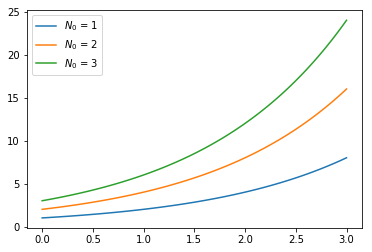

In [88]:
# Une utilisation très pratique de ce mécanisme est fixer des paramètres quand on fait des simulations. 
def croissance_malthusienne(N0, t, r):
    """Une croissance malthusienne"""
    return N0*r**t

# On fixe les paramètres une fois pour toute ici et on a plus besoin de les 
# reporter plus tard dans le code. 
doubling = partial(croissance_malthusienne, r=2)

import matplotlib.pyplot as plt
%matplotlib inline
t = np.linspace(0,3,100)
for N0 in (1,2,3):
    plt.plot(t,doubling(N0=N0, t=t), label='$N_0$ = {}'.format(N0))
plt.legend();

Cette opération est souvent rapprochée d'une autre appelée *[currying](https://en.wikipedia.org/wiki/Currying)* qui n'est pas très utilisée en Python.